# Imports

In [1]:
import sys
import imp
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import spearmanr,pearsonr,ttest_1samp, ttest_ind
import pickle
import warnings
from pylab import Rectangle

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
sys.path.append('../data_processing_code/')

import get_data
imp.reload(get_data)
from get_data import get_data, get_data_online

sys.path.append('./')

import convert_params
imp.reload(convert_params)
from convert_params import *

import plotting
imp.reload(plotting)
from plotting import *

# Load Participant Data

In [3]:
dftmp = pd.read_csv('../data/participant_table_exp1.csv')
data = get_data(dftmp)

pain task excluded:12
rew task excluded:9
has both: 71
pain only:6
rew only:9
subj X task:157
subjs:86
(180, 157)
(180, 157)
(180, 157)
(180, 157)


# Load Parameter Posterior Traces


In [4]:
# load the model 
model_name = 'model=11_covariate=Bi3itemCDM_date=2020_4_27_samples=2000_seed=3_exp=1.pkl'
with open('../fitting_behavioral_model/model_fits/'+model_name, "rb" ) as buff:
    model_output = pickle.load(buff)
trace=model_output['trace']
ppc=model_output['ppc']
model=model_output['model']

# Figure Specs

In [5]:
plt.rcParams.update({'font.size': 11})
plt.rcParams.update({'font.family': 'normal'})
labelsize =10
ticklabelsize=8
legendsize=8

# Figure 3

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


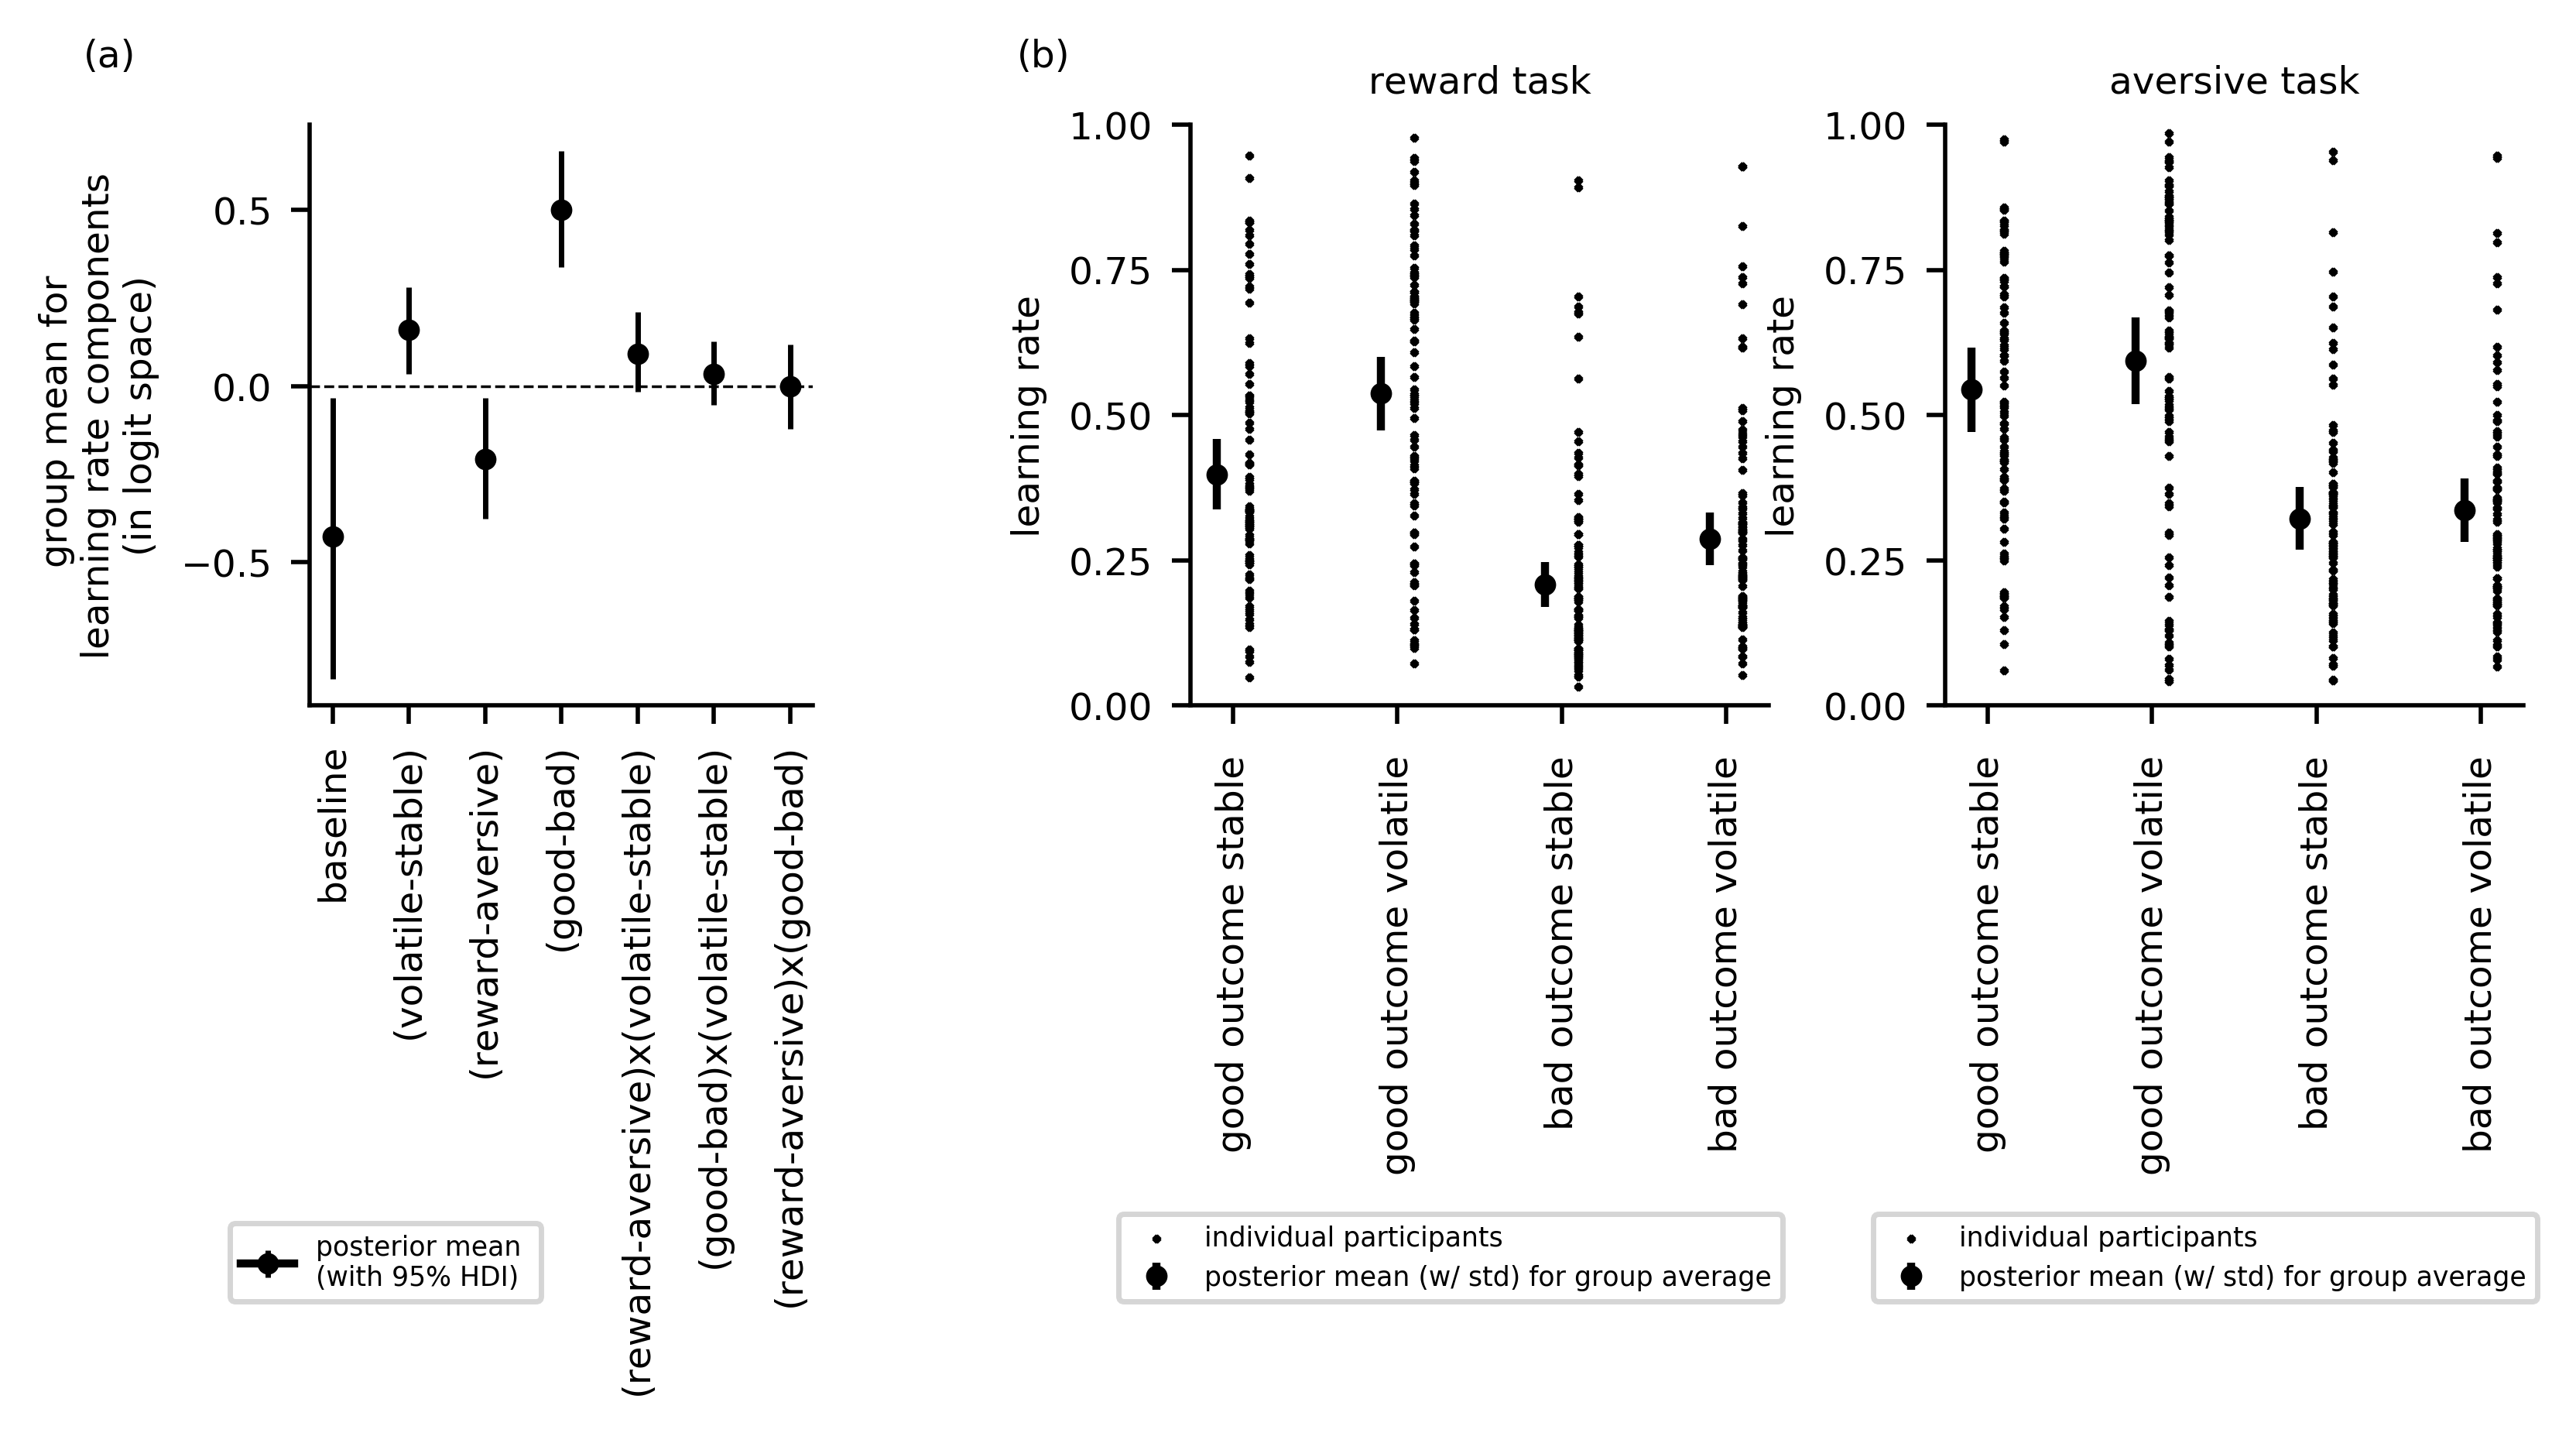

In [6]:
fig  = plt.figure(figsize=(6.5,2.5),dpi=500)

ax1 = plt.axes([0.05, 0.3, 0.2, 0.6]) # left bottom width height 
ax3 = plt.axes([0.4, 0.3, 0.23, 0.6])
ax5 = plt.axes([0.7, 0.3, 0.23, 0.6])
axes = [ax1,ax3,ax5]

# left 
plot_param_posterior_errorbars_onesubplot(trace=trace, # data
                params=model.params, # model parameter names 
                gp='u', # group parameter 
                param = 'lr', # readable name 
                online=False, # different name replacing
                scale='logit',
                flipstab=True,
                mode=False, # use posteriod mode or mean
                offset=0,
                ax=axes[0],# plot characteristics 
                color='k', 
                legend=False,
                title=None,
                legendlabel='posterior mean \n(with 95% HDI)',
                ylabel='group mean for \n learning rate components \n(in logit space)',
                ylabelsize =7,
                xlabelsize = 7,
                titlesize = 7,
                xticklabelsize=7,
                yticklabelsize=7,
                legendsize=5,
                s_bar=3,
                elinewidth=1,
                legend_anchor=[0.6,0.02],
                name_replace=name_replace_nounderscores)


# middle and right 
for i,(ax,task) in enumerate(zip(axes[1:],['reward','aversive'])):
    
    if i==1:
        legend=False
    else:
        legend=False
        
    plot_param_by_cond_sep_axes_for_task(trace,
                                    data,
                                    model,
                                    task=task,
                                    split='mean',
                                    dataset='clinical',
                                    param = 'lr',
                                    transform = 'logit',
                                    pc ='u_PC1', # not used 
                                    generate_codes=generate_codes_7,
                                    median=False,
                                    ax=ax,
                                    legend=legend,
                                    title=task+' task',
                                    mlabel=None,
                                    ylabel=r'learning rate',
                                    violinplot=False,
                                    violinside='left',
                                    ylabelsize =7,
                                    xlabelsize = 7,
                                    titlesize = 7,
                                    xticklabelsize=7,
                                    yticklabelsize=7,
                                    legendsize=5,
                                    s_bar=3,
                                    s=.5,
                                    elinewidth=1,
                                    alpha_dist = 0.05,
                                    ylims=[0,1],
                                    legend_anchor=[0.5,0],
                                    xbreakline=False)


plt.text(-0.45,1.1,'(a)',fontsize=7,transform=ax1.transAxes)
plt.text(-.3,1.1,'(b)',fontsize=7,transform=ax3.transAxes)

# legends 
plt.sca(ax1)
plt.legend(loc='lower center',ncol=1,bbox_to_anchor=[0.15,-1.05],fontsize=5)

plt.sca(ax3)
plt.legend(loc='lower center',ncol=1,bbox_to_anchor=[0.45,-1.05],fontsize=5)

plt.sca(ax5)
plt.legend(loc='lower center',ncol=1,bbox_to_anchor=[0.45,-1.05],fontsize=5)

plt.savefig('../figures/figure_3.png',bbox_inches='tight',dpi=500)

# Figure 4

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

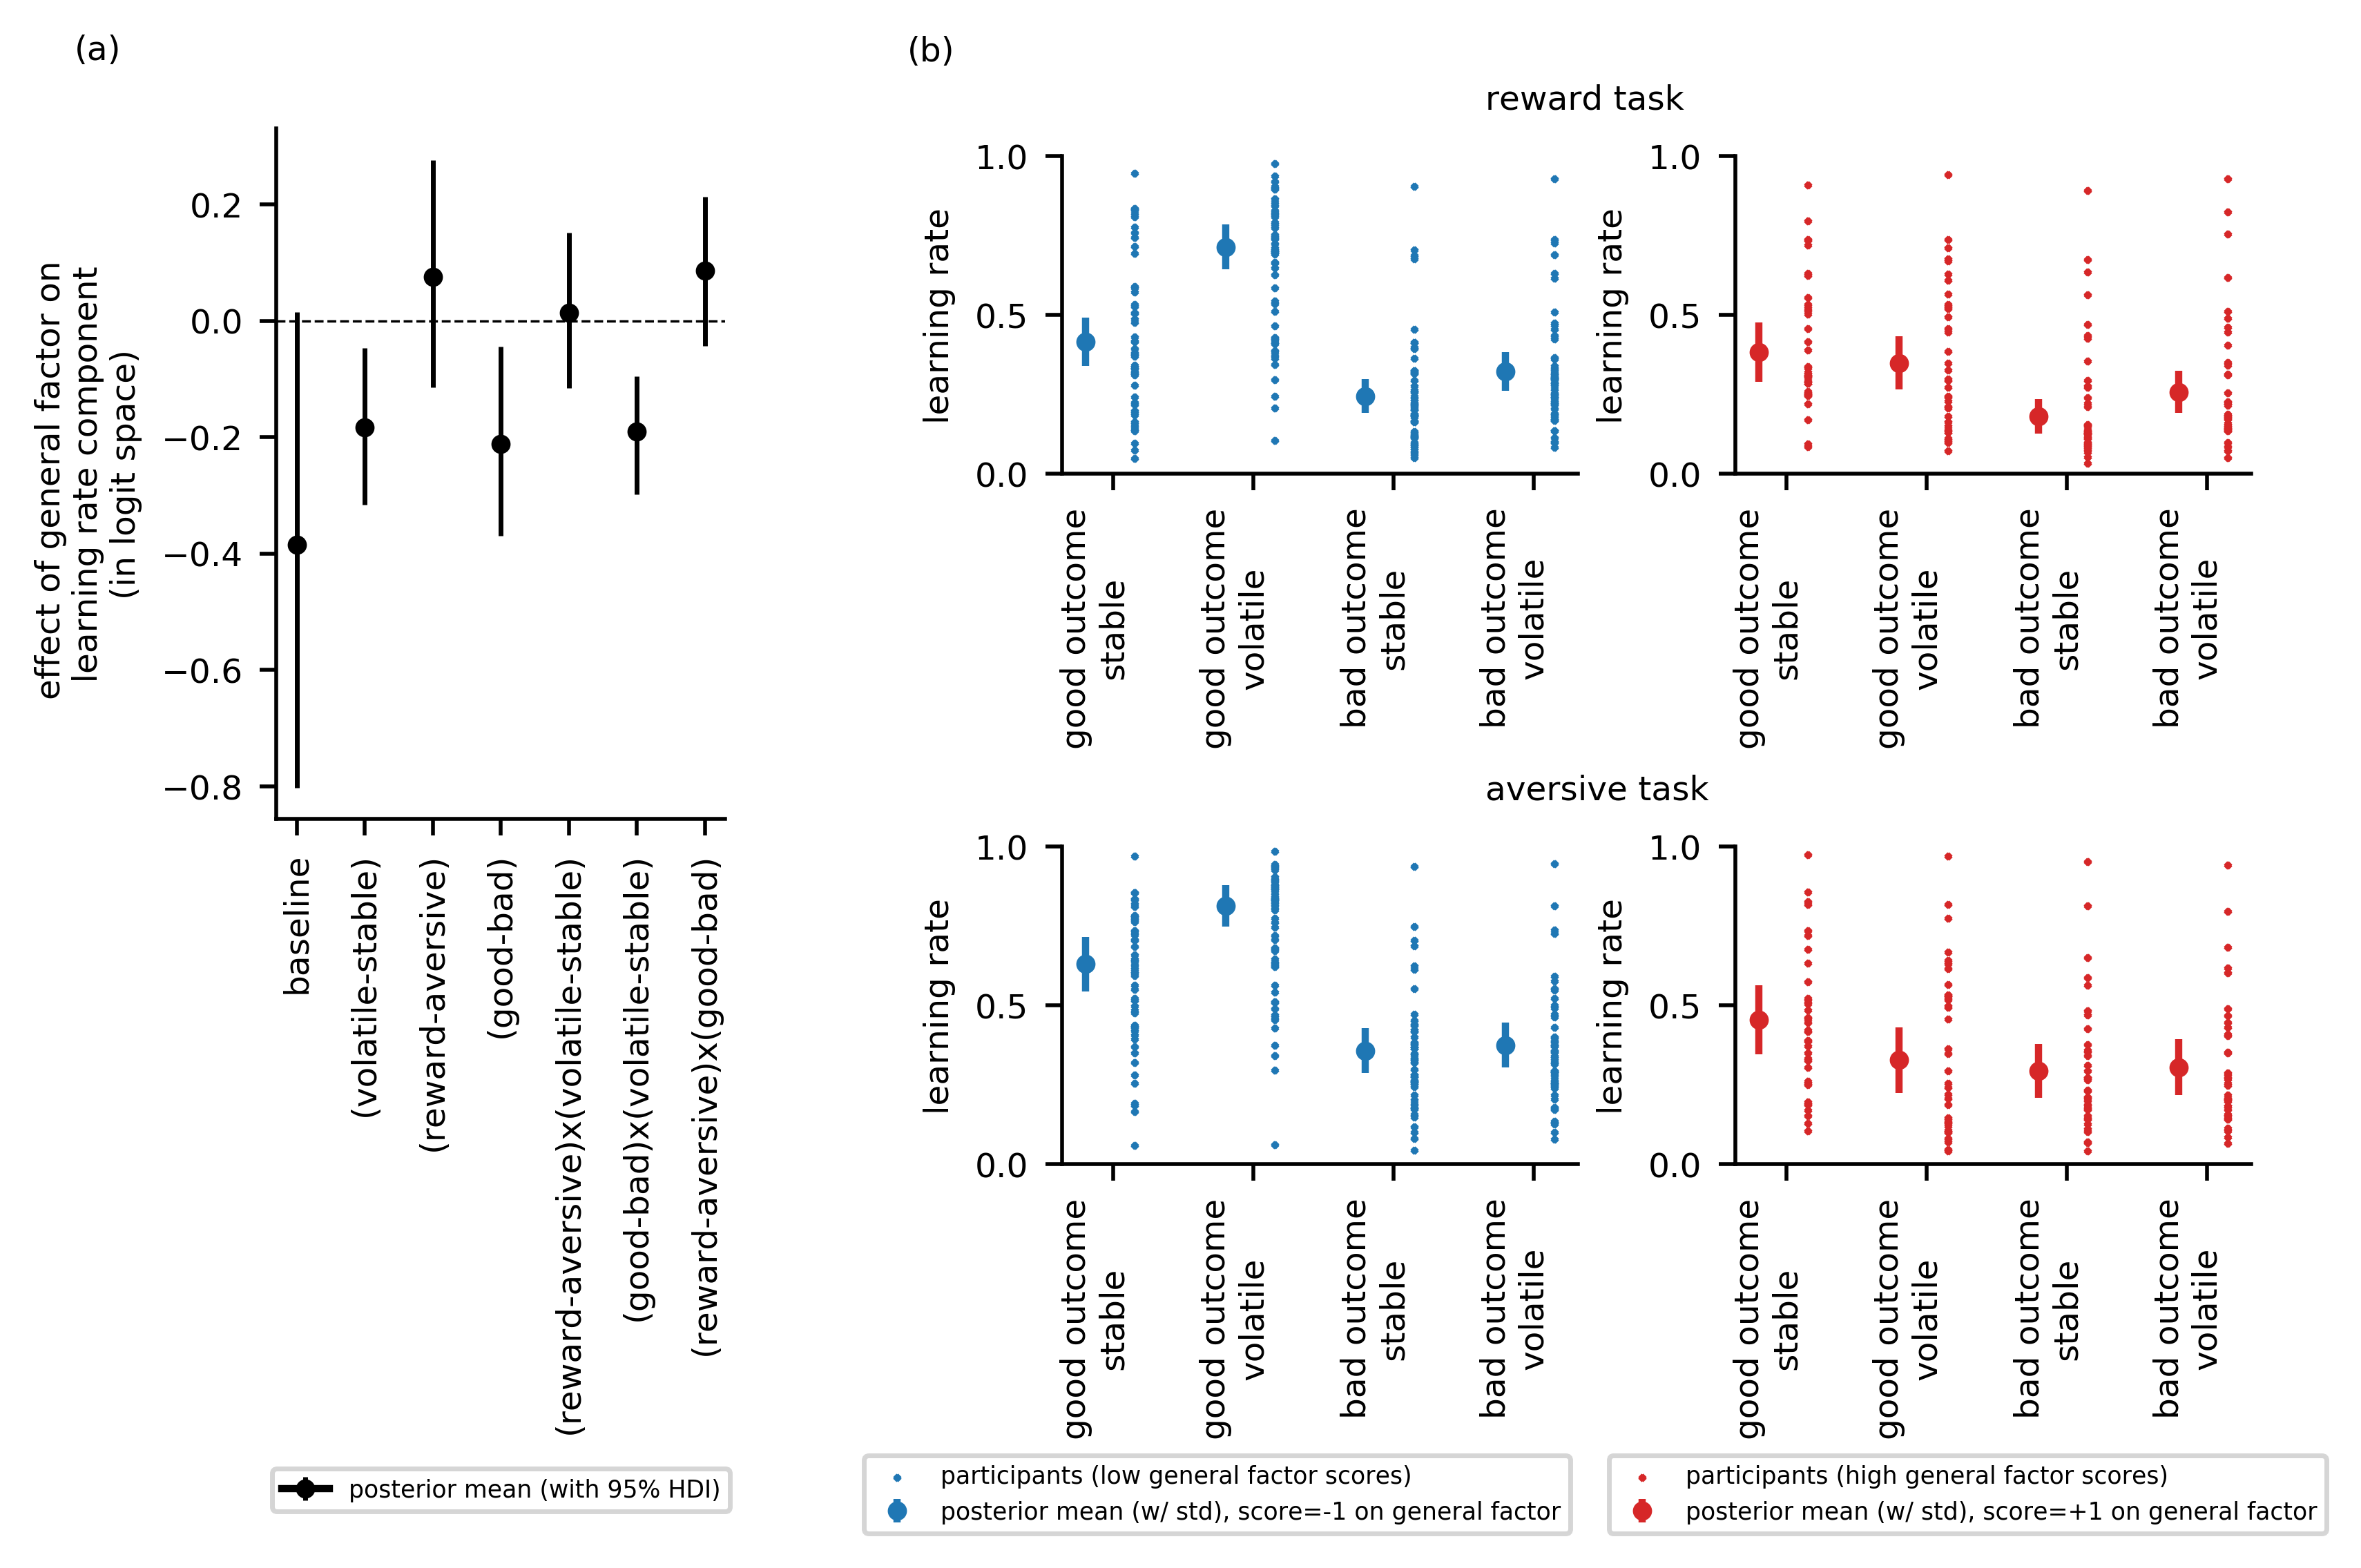

In [7]:
fig  = plt.figure(figsize=(6.5,4),dpi=500)

ax1 = plt.axes([0.05, 0.4, 0.2, 0.5])
ax2 = plt.axes([0.4, 0.65, 0.23, 0.23])
ax3 = plt.axes([0.4, 0.15, 0.23, 0.23])
ax4 = plt.axes([0.7, 0.65, 0.23, 0.23])
ax5 = plt.axes([0.7, 0.15, 0.23, 0.23])


# left 
plot_param_posterior_errorbars_onesubplot(trace=trace, # data
                params=model.params, # model parameter names 
                gp='u_PC1', # group parameter 
                param = 'lr', # readable name 
                online=False, # different name replacing
                scale='logit',
                flipstab=True,
                mode=False, # use posteriod mode or mean
                offset=0,
                ax=ax1,# plot characteristics 
                color='k', 
                legend=False,
                title=None,
                legendlabel='posterior mean (with 95% HDI)',
                ylabel='effect of general factor on \n learning rate component \n(in logit space)',
                ylabelsize =7,
                xlabelsize = 7,
                titlesize = 7,
                xticklabelsize=7,
                yticklabelsize=7,
                legendsize=5,
                s_bar=3,
                elinewidth=1,
                legend_anchor=[0.6,0.02],
                      name_replace=name_replace_nounderscores)


# middle and right 
for i,(ax,task,split) in enumerate(zip([ax2,ax3,ax4,ax5],
                                 ['reward','aversive','reward','aversive'],
                                 ['low','low','high','high'])):
    
    if i==1:
        legend=False
    else:
        legend=False
        
    plot_param_by_cond_sep_axes_for_task(trace,
                                    data,
                                    model,
                                    task=task,
                                    split=split,
                                    dataset='clinical',
                                    param = 'lr',
                                    transform = 'logit',
                                    pc ='u_PC1', # not used 
                                    generate_codes=generate_codes_7,
                                    median=False,
                                    ax=ax,
                                    legend=legend,
                                    title=None,#task+' task',
                                    mlabel=None,
                                    ylabel=r'learning rate',
                                    scatter_offset=0.05,
                                    ebar_offset=-0.1,
                                    violinplot=False,
                                    violinside='left',
                                    ylabelsize =7,
                                    xlabelsize = 7,
                                    titlesize = 7,
                                    xticklabelsize=7,
                                    yticklabelsize=7,
                                    legendsize=5,
                                    s_bar=3,
                                    s=.5,
                                    elinewidth=1,
                                    alpha_dist = 0.05,
                                    ylims=[0,1],
                                    legend_anchor=[0.5,0])

# panel labels 
plt.sca(ax1)
plt.text(-0.45,1.1,'(a)',fontsize=7,transform=ax1.transAxes)


plt.sca(ax2)
plt.text(-.3,1.3,'(b)',fontsize=7,transform=ax2.transAxes)


# Task labels
plt.text(0.82,1.15,'reward task',fontsize=7,transform=ax2.transAxes)
plt.text(0.82,1.15,'aversive task',fontsize=7,transform=ax3.transAxes)


# legends 
plt.sca(ax1)
plt.legend(loc='lower center',ncol=1,bbox_to_anchor=[0.5,-1.02],fontsize=5)

plt.sca(ax3)
plt.legend(loc='lower center',ncol=1,bbox_to_anchor=[0.3,-1.2],fontsize=5)

plt.sca(ax5)
plt.legend(loc='lower center',ncol=1,bbox_to_anchor=[0.45,-1.2],fontsize=5)


plt.savefig('../figures/figure_4.png',bbox_inches='tight',dpi=500)

# Figure 4 figure supplement 1


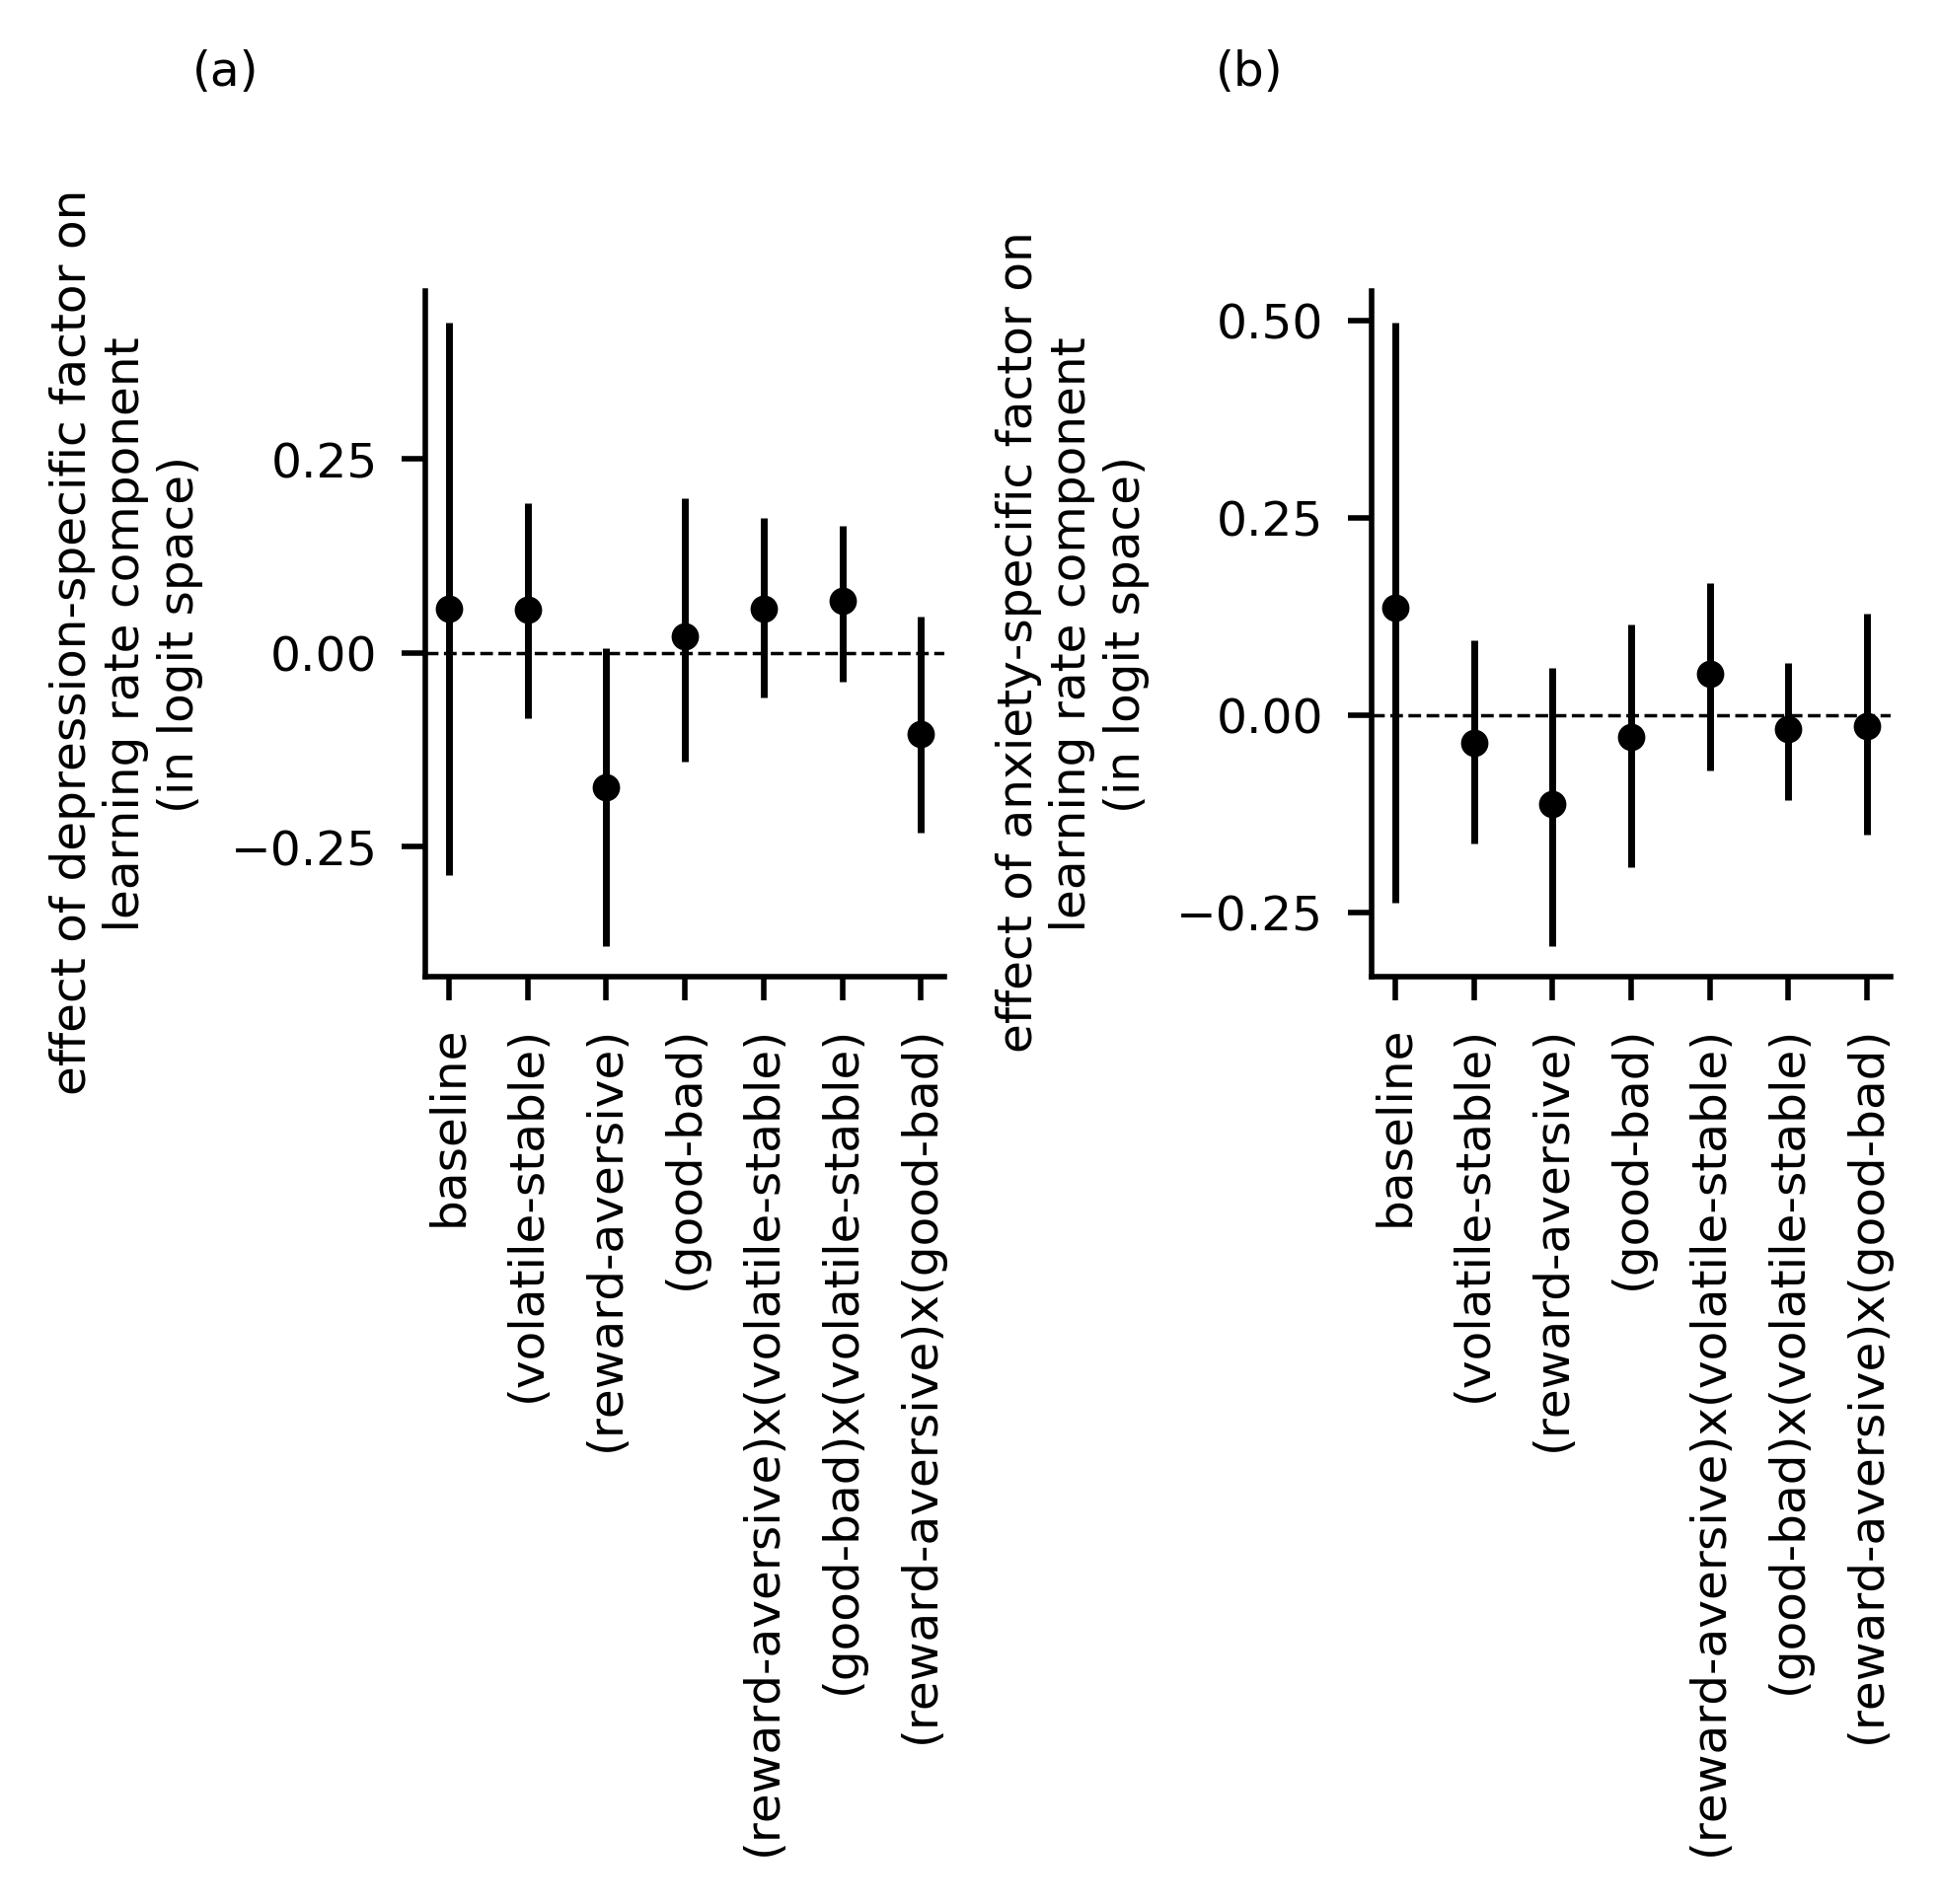

In [8]:
fig,axes  = plt.subplots(1,2,figsize=(4,3.5),dpi=500)

# left 
plot_param_posterior_errorbars_onesubplot(trace=trace, # data
                params=model.params, # model parameter names 
                gp='u_PC2', # group parameter 
                param = 'lr', # readable name 
                online=False, # different name replacing
                scale='logit',
                flipstab=True,
                mode=False, # use posteriod mode or mean
                offset=0,
                ax=axes[0],# plot characteristics 
                color='k', 
                legend=False,
                title=None,
                legendlabel='posterior mean (with 95% HDI)',
                ylabel='effect of depression-specific factor on \n learning rate component \n(in logit space)',
                ylabelsize =7,
                xlabelsize = 7,
                titlesize = 7,
                xticklabelsize=7,
                yticklabelsize=7,
                legendsize=5,
                s_bar=3,
                elinewidth=1,
                legend_anchor=[0.6,0.02],
                      name_replace=name_replace_nounderscores)

# left 
plot_param_posterior_errorbars_onesubplot(trace=trace, # data
                params=model.params, # model parameter names 
                gp='u_PC3', # group parameter 
                param = 'lr', # readable name 
                online=False, # different name replacing
                scale='logit',
                flipstab=True,
                mode=False, # use posteriod mode or mean
                offset=0,
                ax=axes[1],# plot characteristics 
                color='k', 
                legend=False,
                title=None,
                legendlabel='posterior mean (with 95% HDI)',
                ylabel='effect of anxiety-specific factor on \n learning rate component \n(in logit space)',
                ylabelsize =7,
                xlabelsize = 7,
                titlesize = 7,
                xticklabelsize=7,
                yticklabelsize=7,
                legendsize=5,
                s_bar=3,
                elinewidth=1,
                legend_anchor=[0.6,0.02],
                      name_replace=name_replace_nounderscores)

plt.tight_layout()
plt.sca(axes[0])
plt.text(-0.45,1.3,'(a)',fontsize=7,transform=axes[0].transAxes)


plt.sca(axes[1])
plt.text(-.3,1.3,'(b)',fontsize=7,transform=axes[1].transAxes)

plt.savefig('../figures/figure_4_figure_supplement1.png',bbox_inches='tight',dpi=500)

# Posterior Stats

In [9]:
for param in ['lr','Binv','Amix','Bc','mag','lr_c']:
    for i,gp in enumerate(['u','u_PC1','u_PC2','u_PC3',]):
        print('')
        print_posteriors(params=model.params,
                             which=param,
                             trace_dev=trace,
                             group_param=gp,name=gp,roundit=2)


posterior probability for u effects

lr_baseline: 	 P(theta<>0)=0.98* mean=-0.43 	 95%-CI [-0.83,-0.03]
lr_goodbad: 	 P(theta<>0)=1.0* mean=0.5 	 95%-CI [0.34,0.67]
lr_stabvol: 	 P(theta<>0)=1.0* mean=0.16 	 95%-CI [0.04,0.28]
lr_goodbad_stabvol: 	 P(theta<>0)=0.77 mean=0.04 	 95%-CI [-0.05,0.13]
lr_c_baseline: 	 P(theta<>0)=1.0* mean=-3.56 	 95%-CI [-5.07,-2.15]
lr_rewpain: 	 P(theta<>0)=0.99* mean=-0.21 	 95%-CI [-0.38,-0.03]
lr_rewpain_goodbad: 	 P(theta<>0)=0.51 mean=-0.0 	 95%-CI [-0.12,0.12]
lr_rewpain_stabvol: 	 P(theta<>0)=0.94 mean=0.09 	 95%-CI [-0.02,0.21]

posterior probability for u_PC1 effects

lr_baseline: 	 P(theta<>0)=0.97 mean=-0.38 	 95%-CI [-0.8,0.01]
lr_goodbad: 	 P(theta<>0)=0.99* mean=-0.21 	 95%-CI [-0.37,-0.04]
lr_stabvol: 	 P(theta<>0)=1.0* mean=-0.18 	 95%-CI [-0.32,-0.05]
lr_goodbad_stabvol: 	 P(theta<>0)=1.0* mean=-0.19 	 95%-CI [-0.3,-0.1]
lr_c_baseline: 	 P(theta<>0)=0.97 mean=-0.91 	 95%-CI [-1.91,0.0]
lr_rewpain: 	 P(theta<>0)=0.78 mean=0.08 	 95%-CI [